<a href="https://colab.research.google.com/github/vergotten/Neural_CAPTCHA_Solver/blob/main/visualize_orbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
img_path = "/content/drive/MyDrive/orbits/train/183099.jpg"
json_path = "/content/drive/MyDrive/orbits/train/183099.json"

In [16]:
import cv2
import matplotlib.pyplot as plt
import json

class ImageViewer:
    """
    A class used to represent an ImageViewer.

    ...

    Attributes
    ----------
    file_path : str
        a formatted string to print out the file_path
    image : ndarray
        the image in ndarray format

    Methods
    -------
    group_by_category(labels_points)
        Groups shapes by label.
    vis_roi(labels_points)
        Visualizes regions of interest.
    """

    def __init__(self, file_path):
        """
        Constructs all the necessary attributes for the ImageViewer object.

        Parameters
        ----------
            file_path : str
                file path of the image
        """

        self.file_path = file_path
        self.image = cv2.imread(self.file_path)

    def group_by_category(self, labels_points):
        """
        Groups shapes by label.

        Parameters
        ----------
            labels_points : list
                list of labels and points
        """

        # Initialize an empty dictionary for groups
        groups = {}

        # Iterate over items in labels_points
        for item in labels_points:
            label = item['label']
            points = item['points']

            # If label is not in groups, add it
            if label not in groups:
                groups[label] = []
            groups[label].append(points)

        return groups

    def vis_roi(self, labels_points):
        """
        Visualizes regions of interest.

        Parameters
        ----------
            labels_points : list
                list of labels and points
        """

        # Group labels_points by category
        groups = self.group_by_category(labels_points)

        # Iterate over each group
        for label, group in groups.items():
            # Calculate the number of elements and the shape of each element
            num_elements = len(group)
            shapes = [str(len(points)) + '-point shape' for points in group]

            # Print the label, number of elements, and shape of each element
            print(f"Group '{label}' has {num_elements} elements with the following shapes: {', '.join(shapes)}")

class JsonViewer:
    """
    A class used to represent a JsonViewer.

    ...

    Attributes
    ----------
    file_path : str
        a formatted string to print out the file_path

    Methods
    -------
    read_json()
        Reads a JSON file.
    view_json()
        Returns a string of the JSON file content.
    get_all_coords()
        Gets all coordinates from the JSON file.
    """

    def __init__(self, file_path):
        """
        Constructs all the necessary attributes for the JsonViewer object.

        Parameters
        ----------
            file_path : str
                file path of the JSON file
        """

        self.file_path = file_path

    def read_json(self):
        """
        Reads a JSON file.
        """

        # Open and load the JSON file
        with open(self.file_path, 'r') as json_file:
            data = json.load(json_file)

        return data

    def view_json(self):
        """
        Returns a string of the JSON file content.
        """

        # Read the JSON file
        data = self.read_json()

        # Return a string of the JSON file content
        return json.dumps(data, indent=4)

    def get_all_coords(self):
        """
        Gets all coordinates from the JSON file.
        """

        # Read the JSON file
        data = self.read_json()

        # Get shapes from the JSON file
        shapes = data['shapes']

        # Initialize an empty list for all coordinates
        all_coords = []

        # Iterate over shapes
        for shape in shapes:
            label = shape['label']
            coords = shape['points']
            all_coords.append({'label': label, 'points': coords})

        return all_coords


# Create a JsonViewer object
json_viewer = JsonViewer(file_path=json_path)

# Create an ImageViewer object
image_viewer = ImageViewer(file_path=img_path)

# Get all coordinates
labels_points = json_viewer.get_all_coords()

# Visualize regions of interest
image_viewer.vis_roi(labels_points)

Group 'icon' has 6 elements with the following shapes: 2-point shape, 2-point shape, 2-point shape, 2-point shape, 2-point shape, 2-point shape
Group '+' has 5 elements with the following shapes: 1-point shape, 1-point shape, 1-point shape, 1-point shape, 1-point shape
Group '3' has 2 elements with the following shapes: 2-point shape, 2-point shape
Group '5' has 1 elements with the following shapes: 2-point shape
Group '4' has 1 elements with the following shapes: 2-point shape
Group '2' has 1 elements with the following shapes: 2-point shape
Group '1' has 1 elements with the following shapes: 2-point shape


In [30]:
groups = image_viewer.group_by_category(labels_points); print(groups.keys())

icons = groups['icon']; print(f'icons: {icons}')
pluses = groups['+']; print(f'pluses: {pluses}')

[x for x in groups.keys() if x in ['5', '4', '2', '1']]

dict_keys(['icon', '+', '3', '5', '4', '2', '1'])
icons: [[[41.988950276243095, 317.6795580110497], [97.79005524861878, 376.7955801104972]], [[48.06629834254144, 97.23756906077348], [96.68508287292818, 146.96132596685084]], [[99.10497237569058, 90.26519337016573], [146.4088397790055, 139.22651933701655]], [[77.76795580110496, 47.933701657458556], [123.20441988950277, 95.58011049723757]], [[130.46408839779002, 35.43646408839778], [176.24309392265192, 82.04419889502762]], [[127.35911602209941, 3.602209944751369], [173.4806629834254, 46.96132596685083]]]
pluses: [[[100.5524861878453, 72.92817679558011]], [[352.48618784530385, 60.22099447513812]], [[548.0662983425415, 24.30939226519337]], [[670.7182320441989, 124.30939226519337]], [[921.5469613259669, 115.4696132596685]]]


['5', '4', '2', '1']

dict_keys(['icon', '+', '3', '5', '4', '2', '1'])


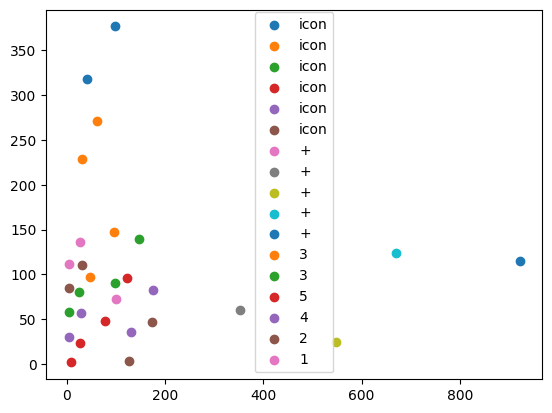

In [17]:
import matplotlib.pyplot as plt

# This Python code is using matplotlib to create a scatter plot of the points in each group.
groups = image_viewer.group_by_category(labels_points); print(groups.keys())

for label, points in groups.items():
    for point in points:
        plt.scatter(*zip(*point), label=label)

plt.legend()
plt.show()

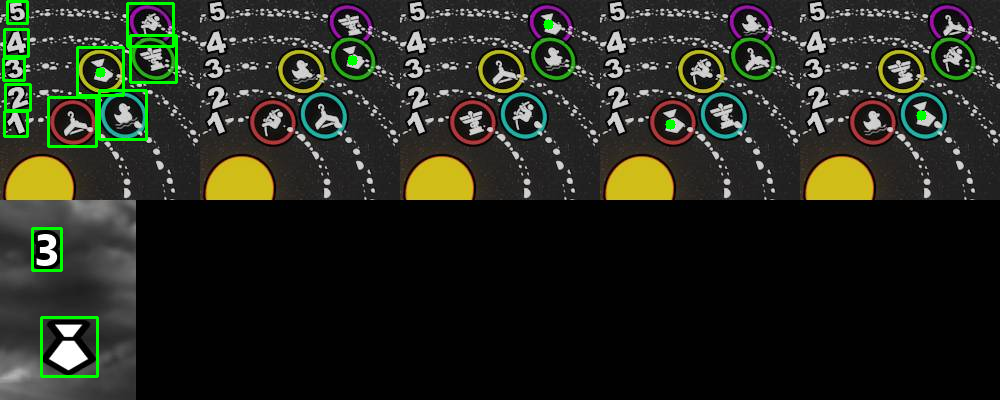

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(img_path)

# Define your groups (bounding boxes and points)
groups = image_viewer.group_by_category(labels_points)

# Iterate over the groups
for label, group in groups.items():
    if label == '+':  # Points
        for point in group:
            # Draw the point on the image
            cv2.circle(image, tuple(map(int, point[0])), radius=5, color=(0, 255, 0), thickness=-1)
    else:  # Bounding boxes
        for box in group:
            # Draw the bounding box on the image
            cv2.rectangle(image, tuple(map(int, box[0])), tuple(map(int, box[1])), color=(0, 255, 0), thickness=2)

# Display the image
cv2_imshow(image)


In [13]:
import pprint

labels_points = json_viewer.get_all_coords(); pprint.pprint(labels_points)

print(len(labels_points))

[{'label': 'icon',
  'points': [[41.988950276243095, 317.6795580110497],
             [97.79005524861878, 376.7955801104972]]},
 {'label': 'icon',
  'points': [[48.06629834254144, 97.23756906077348],
             [96.68508287292818, 146.96132596685084]]},
 {'label': 'icon',
  'points': [[99.10497237569058, 90.26519337016573],
             [146.4088397790055, 139.22651933701655]]},
 {'label': 'icon',
  'points': [[77.76795580110496, 47.933701657458556],
             [123.20441988950277, 95.58011049723757]]},
 {'label': 'icon',
  'points': [[130.46408839779002, 35.43646408839778],
             [176.24309392265192, 82.04419889502762]]},
 {'label': 'icon',
  'points': [[127.35911602209941, 3.602209944751369],
             [173.4806629834254, 46.96132596685083]]},
 {'label': '+', 'points': [[100.5524861878453, 72.92817679558011]]},
 {'label': '+', 'points': [[352.48618784530385, 60.22099447513812]]},
 {'label': '+', 'points': [[548.0662983425415, 24.30939226519337]]},
 {'label': '+', 'point

In [14]:
print(json_viewer.view_json())

{
    "version": "5.2.1",
    "flags": {},
    "shapes": [
        {
            "label": "icon",
            "points": [
                [
                    41.988950276243095,
                    317.6795580110497
                ],
                [
                    97.79005524861878,
                    376.7955801104972
                ]
            ],
            "group_id": null,
            "description": "",
            "shape_type": "rectangle",
            "flags": {}
        },
        {
            "label": "icon",
            "points": [
                [
                    48.06629834254144,
                    97.23756906077348
                ],
                [
                    96.68508287292818,
                    146.96132596685084
                ]
            ],
            "group_id": null,
            "description": "",
            "shape_type": "rectangle",
            "flags": {}
        },
        {
            "label": "icon",
            "points"